In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
mushroom=pd.read_csv('mushroom.csv')

In [3]:
mushroom
#observed that class is the output

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
mushroom.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushroom.dtypes

type                        object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [6]:
#converting data in numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']
for val in list1:
    mushroom[val]=le.fit_transform(mushroom[val].astype(str))

In [7]:
mushroom

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


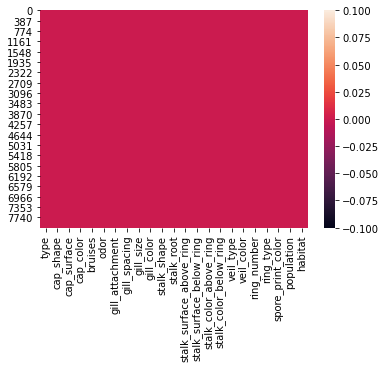

In [8]:
#identifing null values
sns.heatmap(mushroom.isnull())

In [9]:
mushroom.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [10]:
mushroom.skew()

type                        0.071946
cap_shape                  -0.247052
cap_surface                -0.590859
cap_color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill_attachment            -5.977076
gill_spacing                1.840088
gill_size                   0.825797
gill_color                  0.061410
stalk_shape                -0.271345
stalk_root                  0.947852
stalk_surface_above_ring   -1.098739
stalk_surface_below_ring   -0.757703
stalk_color_above_ring     -1.835434
stalk_color_below_ring     -1.791593
veil_type                   0.000000
veil_color                 -6.946944
ring_number                 2.701657
ring_type                  -0.290018
spore_print_color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [11]:
mushroom.corr()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
type,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap_shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap_surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap_color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill_attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill_spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill_size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill_color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [12]:
for col in mushroom.columns:
    if mushroom.skew().loc[col]>0.55:
        mushroom[col]=np.log1p(mushroom[col])

In [13]:
#reduced skew
mushroom.skew()

type                        0.071946
cap_shape                  -0.247052
cap_surface                -0.590859
cap_color                  -0.365280
bruises                     0.342750
odor                       -0.080790
gill_attachment            -5.977076
gill_spacing                1.840088
gill_size                   0.825797
gill_color                  0.061410
stalk_shape                -0.271345
stalk_root                  0.129453
stalk_surface_above_ring   -1.098739
stalk_surface_below_ring   -0.757703
stalk_color_above_ring     -1.835434
stalk_color_below_ring     -1.791593
veil_type                   0.000000
veil_color                 -6.946944
ring_number                 1.481287
ring_type                  -0.290018
spore_print_color           0.548426
population                 -1.413096
habitat                     0.342186
dtype: float64

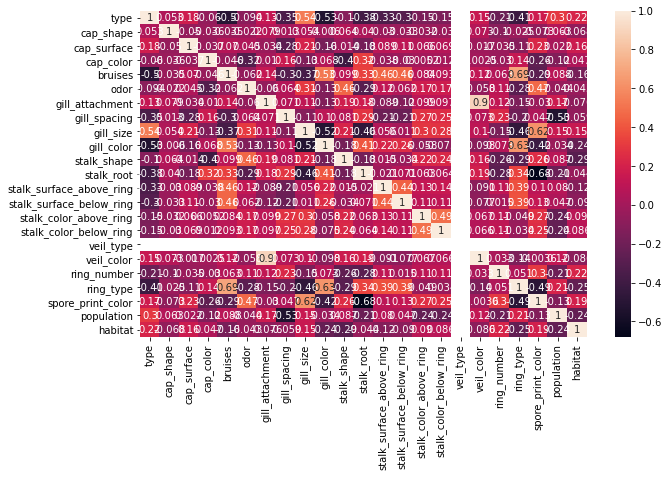

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(mushroom.corr(),annot=True)

In [15]:
mushroom=mushroom.drop(['veil_type'],axis=1)

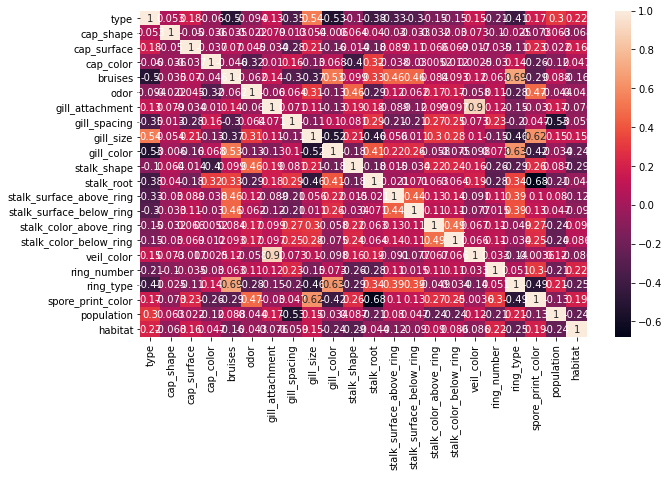

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(mushroom.corr(),annot=True)

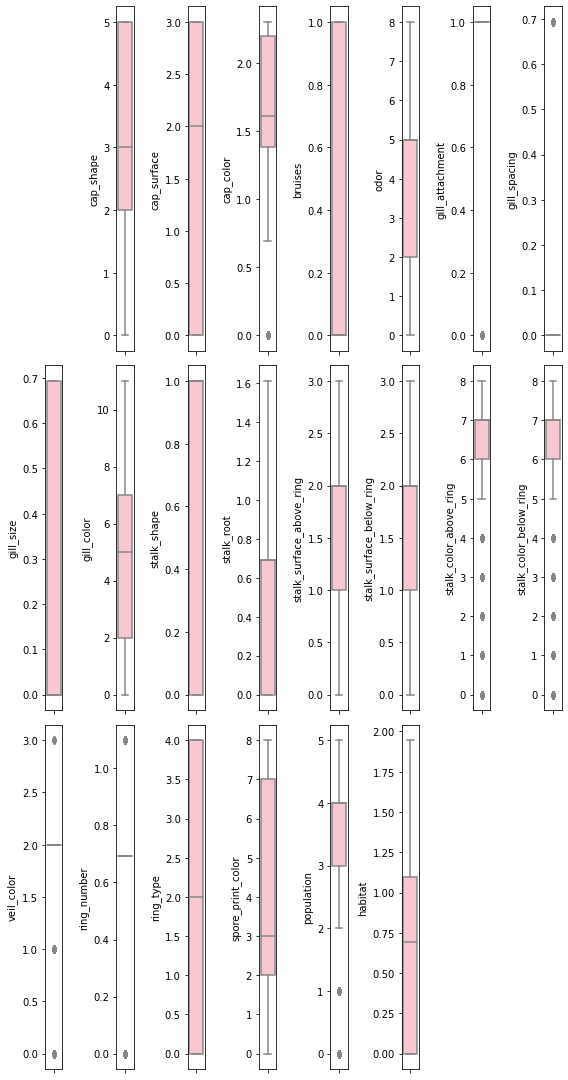

In [17]:
col=mushroom.columns.values
ncol=8
nrow=8
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(mushroom[col[i]],color='pink',orient='v')
    plt.tight_layout()

In [18]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(mushroom))
print(mushroom.shape)
mush=mushroom.loc[(z_score<3).all(axis=1)]
print(mush.shape)

(8124, 22)
(6472, 22)


In [19]:
mush

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,1.609438,1,6,1,0.000000,0.693147,4,...,2,2,7,7,2,0.693147,4,2,3,1.791759
1,0,5,2,2.302585,1,0,1,0.000000,0.000000,4,...,2,2,7,7,2,0.693147,4,3,2,0.693147
2,0,0,2,2.197225,1,3,1,0.000000,0.000000,5,...,2,2,7,7,2,0.693147,4,3,2,1.386294
3,1,5,3,2.197225,1,6,1,0.000000,0.693147,5,...,2,2,7,7,2,0.693147,4,2,3,1.791759
4,0,5,2,1.386294,0,5,1,0.693147,0.000000,4,...,2,2,7,7,2,0.693147,0,3,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,1.098612,0,8,1,0.000000,0.693147,0,...,1,1,6,6,2,0.693147,0,7,4,0.000000
8116,1,3,3,1.609438,0,7,1,0.000000,0.693147,0,...,2,1,6,7,2,0.693147,0,7,4,1.098612
8117,1,3,2,1.098612,0,8,1,0.000000,0.693147,0,...,1,2,6,7,2,0.693147,0,7,4,0.000000
8118,1,3,3,1.609438,0,2,1,0.000000,0.693147,0,...,1,2,6,7,2,0.693147,0,7,4,0.000000


In [20]:
x=mush.iloc[:,1:-1]

In [21]:
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,1.386294,2,2,7,7,2,0.693147,4,2,3
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,1.098612,2,2,7,7,2,0.693147,4,3,2
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,1.098612,2,2,7,7,2,0.693147,4,3,2
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,1.386294,2,2,7,7,2,0.693147,4,2,3
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,1.386294,2,2,7,7,2,0.693147,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,3,3,1.098612,0,8,1,0.000000,0.693147,0,1,0.000000,1,1,6,6,2,0.693147,0,7,4
8116,3,3,1.609438,0,7,1,0.000000,0.693147,0,1,0.000000,2,1,6,7,2,0.693147,0,7,4
8117,3,2,1.098612,0,8,1,0.000000,0.693147,0,1,0.000000,1,2,6,7,2,0.693147,0,7,4
8118,3,3,1.609438,0,2,1,0.000000,0.693147,0,1,0.000000,1,2,6,7,2,0.693147,0,7,4


In [22]:
x.shape

(6472, 20)

In [23]:
y=mush.iloc[:,0]

In [24]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8113    1
8116    1
8117    1
8118    1
8122    1
Name: type, Length: 6472, dtype: int32

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [26]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1027    0]
 [   0  915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00       915

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



In [27]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1027    0]
 [   0  915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00       915

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



In [28]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8516992790937178
[[975  52]
 [236 679]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1027
           1       0.93      0.74      0.83       915

    accuracy                           0.85      1942
   macro avg       0.87      0.85      0.85      1942
weighted avg       0.86      0.85      0.85      1942



In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9979402677651905
[[1025    2]
 [   2  913]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00       915

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



In [30]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9891864057672503
[[1026    1]
 [  20  895]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1027
           1       1.00      0.98      0.99       915

    accuracy                           0.99      1942
   macro avg       0.99      0.99      0.99      1942
weighted avg       0.99      0.99      0.99      1942



In [31]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1027    0]
 [   0  915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00       915

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



In [32]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9577754891864058
[[988  39]
 [ 43 872]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1027
           1       0.96      0.95      0.96       915

    accuracy                           0.96      1942
   macro avg       0.96      0.96      0.96      1942
weighted avg       0.96      0.96      0.96      1942



In [33]:
#LogisticRegression is best
import joblib
joblib.dump(lr,'salary.pkl')

['salary.pkl']